In [95]:
%load_ext autoreload
%autoreload 2

from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt

from load_mcxc_data import load_clusters
from cluster_measurements import ClusterMeasurements
import iqbal_agn_heating_functions as iq

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
cluster=load_clusters(nrows=1)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/99/vfh56jrs1nqcj8zqtcs5fkv40000gn/T/ipykernel_21796/1396976096.py", line 1, in <module>
    cluster=load_clusters(nrows=1)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eleanorstuart/Desktop/krisp/thermo-idm/load_mcxc_data.py", line 48, in load_clusters
    return [Cluster(cm)for cm in cluster_measurements]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eleanorstuart/Desktop/krisp/thermo-idm/load_mcxc_data.py", line 48, in <listcomp>
    return [Cluster(cm)for cm in cluster_measurements]
            ^^^^^^^^^^^
  File "<string>", line 16, in __init__
  File "/Users/eleanorstuart/Desktop/krisp/thermo-idm/cluster.py", line 78, in __post_init__
    self.eff_agn_heating_rate=self.get_effervescent_agn_heating_rate(rc_fa

In [250]:
test_data = ClusterMeasurements(R500=1*u.Mpc, 
                                M500=1*1e14*u.Msun, 
                                #L500=7e44*u.erg/u.s,
                                z=3)
xs = np.logspace(-2, 1)
rs = xs*test_data.R500

In [251]:
iq.E(test_data.z)

<Quantity 4.4609416>

In [252]:
iq.P500(test_data)

<Quantity 5.28000916e-12 erg / cm3>

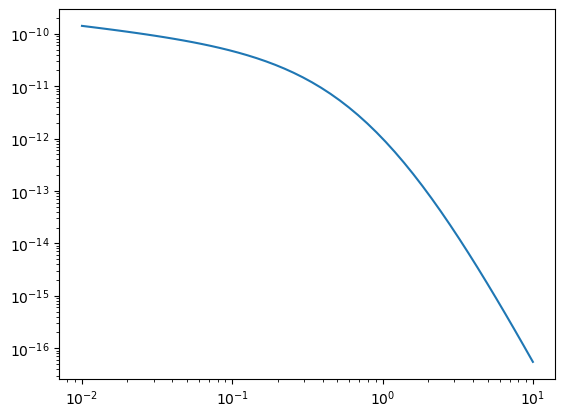

In [253]:
plt.loglog(xs, iq.Pg(xs, test_data))

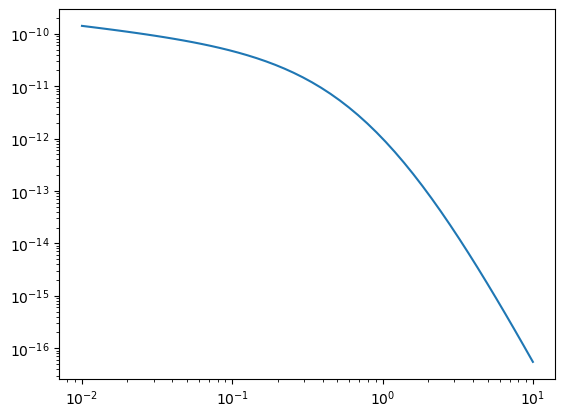

In [254]:
plt.loglog(rs, iq.Pg_r(rs, test_data))

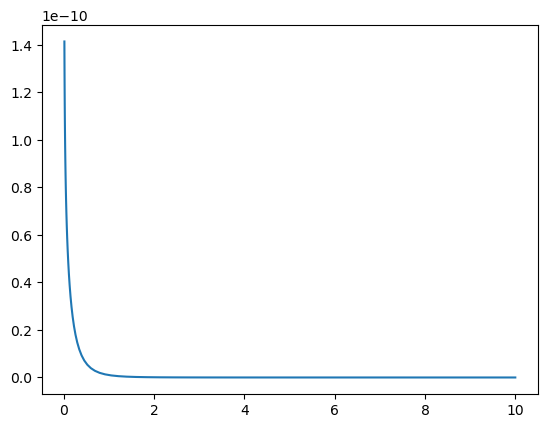

In [255]:
plt.plot(rs, iq.Pg_r(rs, test_data))

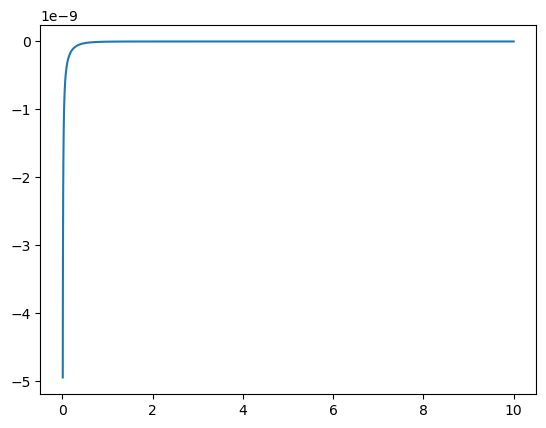

In [256]:
#iq.dP_dr(rs, test_data)
plt.plot(rs, iq.dP_dr(rs, test_data))
#plt.xscale('log')
#plt.yscale('symlog')

In [257]:
r0 = (0.015*test_data.R500).to(u.cm)
rc = 0.1*test_data.R500
iq.integrand(rs[0], test_data, r0, rc)

array([[-0.05321965]])

In [258]:
iq.q(test_data, r0, rc)

<Quantity -0.00209165 erg(1/4) / cm(3/4)>

In [259]:
Linj=7e44*u.erg/u.s
iq.h(Linj, rs, r0, rc, iq.q(test_data, r0, rc))

<Quantity [-1.17253724e+50, -9.59417531e+49, -7.78774313e+49,
           -6.26543075e+49, -4.99137784e+49, -3.93373738e+49,
           -3.06402199e+49, -2.35657001e+49, -1.78813406e+49,
           -1.33759208e+49, -9.85774538e+48, -7.15391318e+48,
           -5.11030012e+48, -3.59187363e+48, -2.48291330e+48,
           -1.68676215e+48, -1.12487941e+48, -7.35173131e+47,
           -4.69789640e+47, -2.92656497e+47, -1.77081959e+47,
           -1.03628261e+47, -5.83561258e+46, -3.14394675e+46,
           -1.60966486e+46, -7.77172252e+45, -3.50722269e+45,
           -1.46430766e+45, -5.58998402e+44, -1.92490881e+44,
           -5.88642799e+43, -1.57010957e+43, -3.57813865e+42,
           -6.80276448e+41, -1.04978440e+41, -1.27403900e+40,
           -1.17256753e+39, -7.84835778e+37, -3.64053636e+36,
           -1.10710096e+35, -2.07054076e+33, -2.21254260e+31,
           -1.24110433e+29, -3.31481646e+26, -3.76752138e+23,
           -1.60110935e+20, -2.19217130e+16, -8.14597416e+11,
        

(0.01, 1)

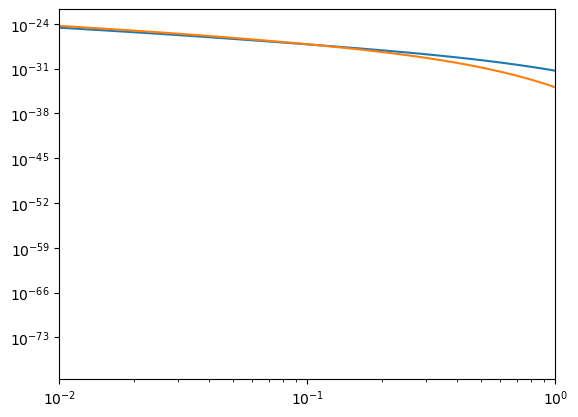

In [263]:
plt.loglog(rs/test_data.R500, iq.vol_heating_rate(rs, test_data, Linj, 0.3*test_data.R500))
plt.loglog(rs/test_data.R500, iq.vol_heating_rate(rs, test_data, Linj, rc))
plt.xlim(0.01, 1)

In [264]:
test_data_2 = ClusterMeasurements(R500=1*u.Mpc, M500=2*1e14*u.Msun, z=0.1)

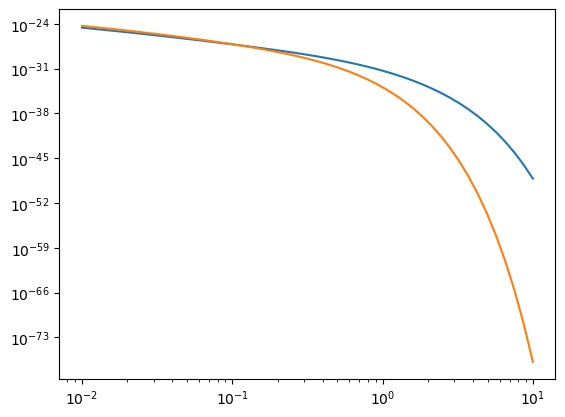

In [267]:
plt.loglog(rs/test_data.R500, iq.vol_heating_rate(rs, test_data, Linj, 0.3*test_data.R500))
plt.loglog(rs/test_data.R500, iq.vol_heating_rate(rs, test_data, Linj, rc))
plt.xlim(0.01, 1)
